## Q1

查看数据分布规律

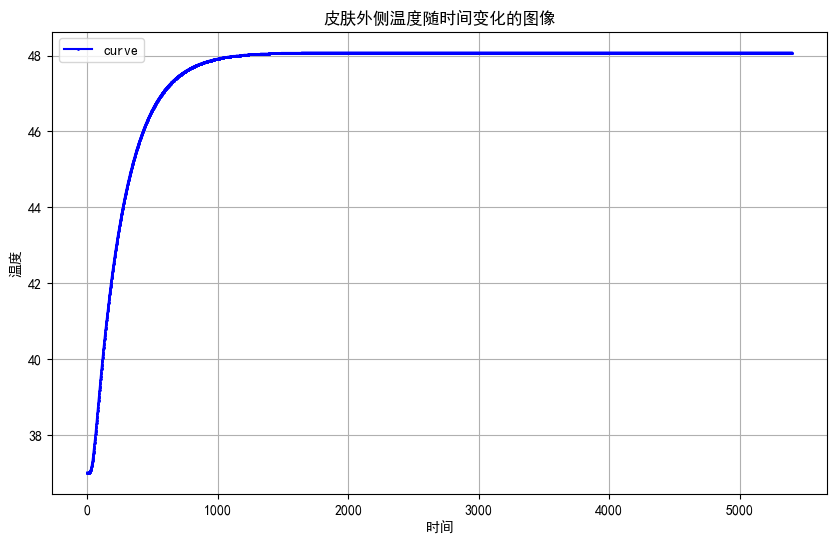

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 使用SimHei字体这样可以显示title中的中文，但这个不显示负号
plt.rcParams['axes.unicode_minus'] = False  
# 解决负号显示问题

dataST = pd.read_excel(r'D:\ProgramData\pythonProject\mathmaticModling\CUMCM-2018-Problem-A-Chinese-Appendix.xlsx', sheet_name ='附件2')
x = dataST.iloc[1:, 0] # 时间
y = dataST.iloc[1:, 1] # 温度

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='b', label='curve', markersize=2)
plt.xlabel('时间')  # 替换为实际的 x 轴标签
plt.ylabel('温度')  # 替换为实际的 y 轴标签
plt.title('皮肤外侧温度随时间变化的图像')  # 替换为实际的图表标题
plt.legend()
plt.grid(True)
plt.show()

由热传导方程导出分布

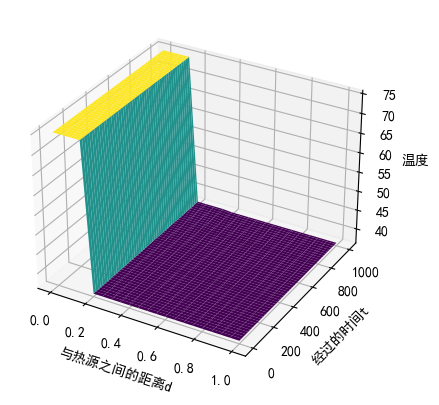

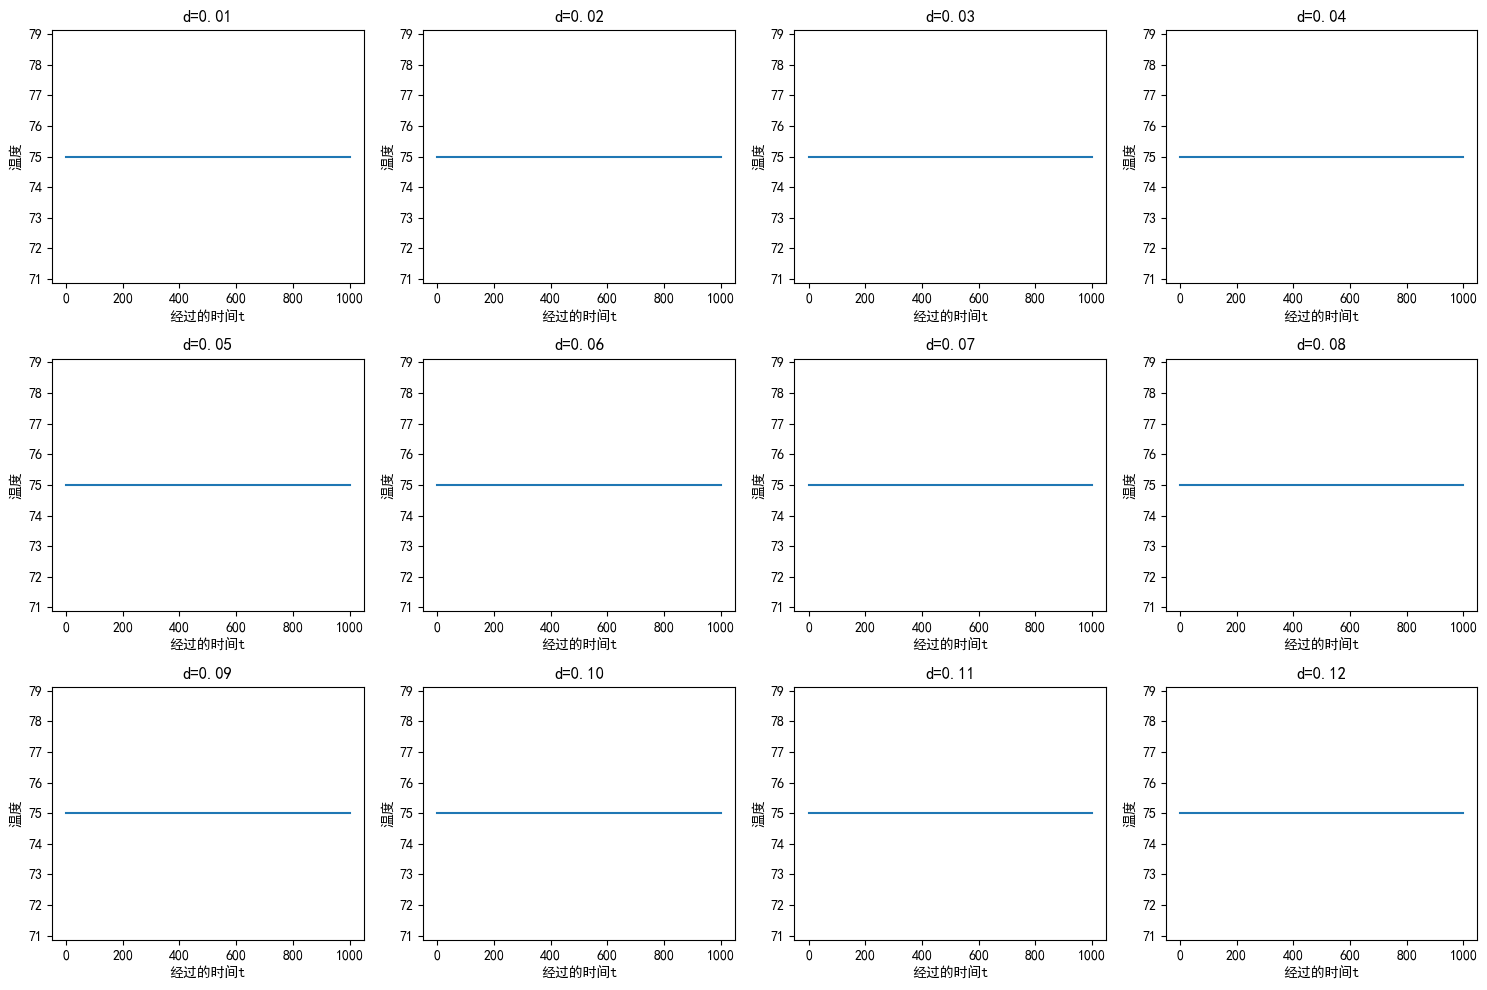

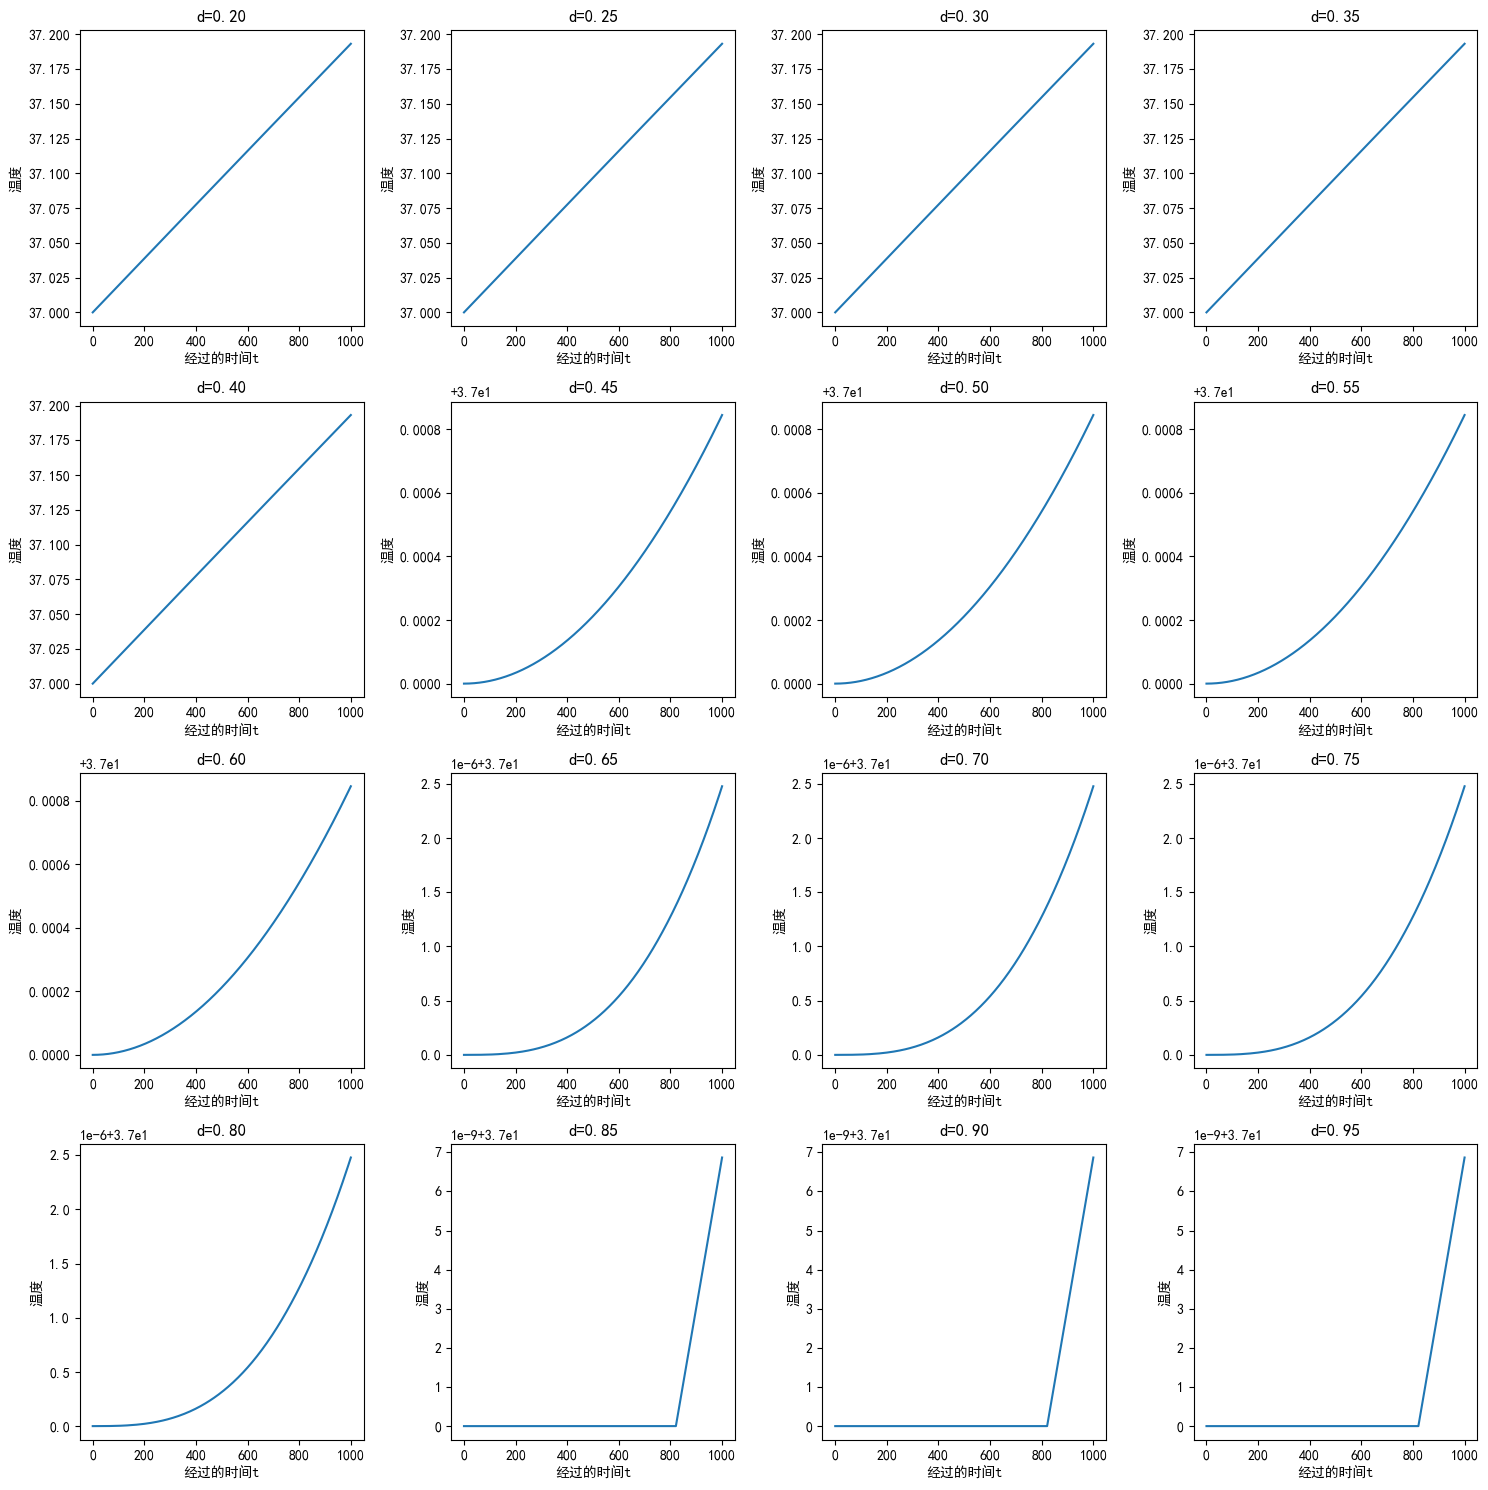

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# 使用SimHei字体这样可以显示title中的中文，但这个不显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False 

T_env = 75 # 外界温度，75ºC
T_0 = 37   # 初始人体温度，37ºC
# 厚度 (单位: m)
d1 = 0.6
d2 = 0.6  # 0.6-25
d3 = 3.6
d4 = 0.6  # 0.6-6.4
d_total = d1 + d2 + d3 + d4
# 密度 (单位: kg/m^3)
rho1 = 300
rho2 = 862
rho3 = 74.2
rho4 = 1.18
# 比热容 (单位: J/kg·ºC)
c1 = 1377   
c2 = 2100
c3 = 1726
c4 = 1005
# 热传导率 (单位: W/m·ºC) 
k1 = 0.082
k2 = 0.37
k3 = 0.045
k4 = 0.028
# 热传导系数 (单位: m^2/s)
alpha1 = k1 / (rho1 * c1)
alpha2 = k2 / (rho2 * c2)
alpha3 = k3 / (rho3 * c3)
alpha4 = k4 / (rho4 * c4)

# 参数设置
Nx = 100  # x轴的分段数
Nt = 5400  # t轴的分段数
xd = 1    # x轴长度
t_total = 5400 # 总时间

dt = 1 / Nt  # 时间步长
dx = xd / Nx  # 空间步长

# 定义多层的热传导系数和对应的边界
layers = [(0, d1 / d_total, alpha1),  # 第一层：位置0到0.3
          (d1 / d_total, (d1+d2) / d_total, alpha2),  # 第二层：位置0.3到0.7
          ((d1+d2) / d_total, (d1+d2+d3) / d_total, alpha3),
          ((d1+d2+d3) / d_total, (d1+d2+d3+d4) / d_total, alpha4)]  # 第三层：位置0.7到1.0
# 初始化温度分布矩阵
u = np.zeros((Nx + 1, int(t_total * Nt) + 1))
u[-1, :] = 37  # 右边界恒定温度 37°C
u[:, 0] = 37  # 初始温度为 37°C
u[0, :] = 75   # 左边界恒定温度 75°C

# 主循环：计算内部温度分布
for j in range(int(t_total * Nt)):
    for i in range(1, Nx):
        # 确定当前位置属于哪一层，并选择对应的热传导系数
        x = i * dx
        for (x_start, x_end, alpha) in layers:
            if x_start <= x < x_end:
                break
        
        # 应用当前层的热传导系数更新温度
        u[i, j + 1] = (
            (1 - 2 * alpha * dt / dx ** 2) * u[i, j] +
            (alpha * dt / dx ** 2) * (u[i + 1, j] + u[i - 1, j])
        )

# 创建温度分布函数 f(x, t)
def f(x, t):
    return u[int(x * Nx / xd), int(t * Nt)]

# 生成网格和温度分布图
X = np.arange(0, 1.05, 0.05)
T = np.arange(0, 1001, 1)
xx, tt = np.meshgrid(X, T)

Z = np.zeros((len(T), len(X)))
for ii in range(len(X)):
    for jj in range(len(T)):
        Z[jj, ii] = f(X[ii], T[jj])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(xx, tt, Z, cmap='viridis')
ax1.set_xlabel('与热源之间的距离d')
ax1.set_ylabel('经过的时间t')
ax1.set_zlabel('温度')
plt.show()

# 找出x=d时，温度随时间的变化趋势
fig2, axs = plt.subplots(3, 4, figsize=(15, 10))
d_values = np.arange(0.01, 0.13, 0.01)
for idx, d in enumerate(d_values):
    t_x_d = np.arange(0, 1001, 1)
    U_d = [f(d, t) for t in t_x_d]
    
    row = idx // 4
    col = idx % 4
    axs[row, col].plot(t_x_d, U_d)
    axs[row, col].set_xlabel('经过的时间t')
    axs[row, col].set_ylabel('温度')
    axs[row, col].set_title(f'd={d:.2f}')

plt.tight_layout()
plt.show()

# 找出更大范围的x=d时，温度随时间的变化趋势
fig3, axs = plt.subplots(4, 4, figsize=(15, 15))
d_values = np.arange(0.2, 1.0, 0.05)
for idx, d in enumerate(d_values):
    t_x_d = np.arange(0, 1001, 1)
    U_d = [f(d, t) for t in t_x_d]
    
    row = idx // 4
    col = idx % 4
    axs[row, col].plot(t_x_d, U_d)
    axs[row, col].set_xlabel('经过的时间t')
    axs[row, col].set_ylabel('温度')
    axs[row, col].set_title(f'd={d:.2f}')

plt.tight_layout()
plt.show()
